In [1]:
import pandas as pd
import numpy as numpy
import scipy.stats as stats
import matplotlib.pyplot as plt

In [2]:
pwii_combined_data = pd.read_csv('post_WWII_data_1002.csv').drop(columns='result')
pwii_combined_data.head()

,Unnamed: 0,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,month,goal_diff,home_result,lat,lng,host_continent,home_continent,away_continent,results
0,0,1950-01-24,Zambia,DR Congo,1,0,Friendly,Kitwe,Northern Rhodesia,False,1950,1,1,win,NaN,NaN,Others,Africa,Africa,Zambia
1,1,1950-02-17,Egypt,Greece,2,0,Friendly,Cairo,Egypt,False,1950,2,2,win,NaN,NaN,Africa,Africa,Europe,Egypt
2,2,1950-02-26,Bolivia,Chile,2,0,Friendly,La Paz,Bolivia,False,1950,2,2,win,NaN,NaN,South America,South America,South America,Bolivia
3,3,1950-02-26,Croatia,Serbia,4,1,Friendly,Zagreb,Yugoslavia,False,1950,2,3,win,NaN,NaN,Europe,Europe,Europe,Croatia
4,4,1950-03-05,Italy,Belgium,3,1,Friendly,Bologna,Italy,False,1950,3,2,win,NaN,NaN,Europe,Europe,Europe,Italy


In [3]:
pwii_combined_data['total_goals']=pwii_combined_data.home_score + pwii_combined_data.away_score

In [4]:
pwii_wins = pwii_combined_data.results.value_counts()
pwii_wins_df = pd.DataFrame(pwii_wins)
pwii_wins_df = pwii_wins_df.reset_index()
pwii_wins_df = pwii_wins_df.rename(columns={'index':'team'})
pwii_wins_df

,team,results
0,Tie,8911
1,Brazil,571
2,Germany,455
3,South Korea,448
4,Mexico,416
...,...,...
295,Micronesia,1
296,Two Sicilies,1
297,Republic of St. Pauli,1
298,Curacao,1


In [5]:
pwii_grouped_home = pwii_combined_data.groupby('home_team',as_index=False).sum().drop(columns=['Unnamed: 0','neutral','year','month','goal_diff','lat','lng'])
pwii_grouped_home_score = pwii_grouped_home.rename(columns={'home_score':'home_goals','away_score':'home_lost_goals','total_goals':'home_goals_per_game'})
pwii_grouped_home_score

,home_team,home_goals,home_lost_goals,home_goals_per_game
0,Abkhazia,36,11,47
1,Afghanistan,48,56,104
2,Albania,175,180,355
3,Alderney,5,27,32
4,Algeria,508,247,755
...,...,...,...,...
302,Yugoslavia,320,143,463
303,Zambia,555,242,797
304,Zanzibar,61,97,158
305,Zimbabwe,289,166,455


In [6]:
pwii_grouped_away = pwii_combined_data.groupby('away_team',as_index=False).sum().drop(columns=['Unnamed: 0','neutral','year','month','goal_diff','lat','lng'])
pwii_grouped_away_score = pwii_grouped_away.rename(columns={'home_score':'away_lost_goals','away_score':'away_goals','total_goals':'away_goals_per_game'})
pwii_grouped_away_score

,away_team,away_lost_goals,away_goals,away_goals_per_game
0,Abkhazia,13,12,25
1,Afghanistan,153,63,216
2,Albania,309,102,411
3,Alderney,48,10,58
4,Algeria,268,185,453
...,...,...,...,...
297,Yugoslavia,321,348,669
298,Zambia,467,541,1008
299,Zanzibar,328,122,450
300,Zimbabwe,341,314,655


In [7]:
pwii_overview_score = pd.merge(pwii_grouped_home_score,pwii_grouped_away_score,left_on='home_team',right_on='away_team',how='outer')
pwii_overview_score

,home_team,home_goals,home_lost_goals,home_goals_per_game,away_team,away_lost_goals,away_goals,away_goals_per_game
0,Abkhazia,36.0,11.0,47.0,Abkhazia,13.0,12.0,25.0
1,Afghanistan,48.0,56.0,104.0,Afghanistan,153.0,63.0,216.0
2,Albania,175.0,180.0,355.0,Albania,309.0,102.0,411.0
3,Alderney,5.0,27.0,32.0,Alderney,48.0,10.0,58.0
4,Algeria,508.0,247.0,755.0,Algeria,268.0,185.0,453.0
...,...,...,...,...,...,...,...,...
305,Zimbabwe,289.0,166.0,455.0,Zimbabwe,341.0,314.0,655.0
306,Åland Islands,47.0,41.0,88.0,Åland Islands,34.0,26.0,60.0
307,NaN,NaN,NaN,NaN,Surrey,1.0,3.0,4.0
308,NaN,NaN,NaN,NaN,Two Sicilies,8.0,2.0,10.0


In [8]:
pwii_grouped_home_count = pwii_combined_data.groupby('home_team',as_index=False).count().drop(columns=['Unnamed: 0','neutral','year','month','goal_diff','lat','lng',
                                                                       'date','away_team','home_score','away_score','tournament','city',
                                                                       'country','neutral','home_result','away_continent','results',
                                                                       'total_goals','host_continent'])
pwii_grouped_home_count

,home_team,home_continent
0,Abkhazia,18
1,Afghanistan,36
2,Albania,164
3,Alderney,7
4,Algeria,286
...,...,...
302,Yugoslavia,140
303,Zambia,296
304,Zanzibar,57
305,Zimbabwe,184


In [9]:
pwii_grouped_away_count = pwii_combined_data.groupby('away_team',as_index=False).count().drop(columns=['Unnamed: 0','neutral','year','month','goal_diff','lat','lng',
                                                                       'date','home_team','home_score','away_score','tournament','city',
                                                                       'country','neutral','home_result','home_continent','results',
                                                                       'total_goals','host_continent'])
pwii_grouped_away_count

,away_team,away_continent
0,Abkhazia,10
1,Afghanistan,69
2,Albania,147
3,Alderney,12
4,Algeria,211
...,...,...
297,Yugoslavia,216
298,Zambia,407
299,Zanzibar,145
300,Zimbabwe,260


In [10]:
pwii_overview_count = pd.merge(pwii_grouped_home_count,pwii_grouped_away_count, left_on='home_team',right_on='away_team',how='outer')
pwii_overview_count = pwii_overview_count.rename(columns={'home_continent':'home_game_count','away_continent':'away_game_count'})

In [11]:
pwii_overview_combined = pd.merge(pwii_overview_count,pwii_overview_score,on=['home_team','away_team'],how='outer')
pwii_overview_combined = pwii_overview_combined.rename(columns={'home_team':'team'})
pwii_overview_combined

,team,home_game_count,away_team,away_game_count,home_goals,home_lost_goals,home_goals_per_game,away_lost_goals,away_goals,away_goals_per_game
0,Abkhazia,18.0,Abkhazia,10.0,36.0,11.0,47.0,13.0,12.0,25.0
1,Afghanistan,36.0,Afghanistan,69.0,48.0,56.0,104.0,153.0,63.0,216.0
2,Albania,164.0,Albania,147.0,175.0,180.0,355.0,309.0,102.0,411.0
3,Alderney,7.0,Alderney,12.0,5.0,27.0,32.0,48.0,10.0,58.0
4,Algeria,286.0,Algeria,211.0,508.0,247.0,755.0,268.0,185.0,453.0
...,...,...,...,...,...,...,...,...,...,...
305,Zimbabwe,184.0,Zimbabwe,260.0,289.0,166.0,455.0,341.0,314.0,655.0
306,Åland Islands,27.0,Åland Islands,19.0,47.0,41.0,88.0,34.0,26.0,60.0
307,NaN,NaN,Surrey,1.0,NaN,NaN,NaN,1.0,3.0,4.0
308,NaN,NaN,Two Sicilies,4.0,NaN,NaN,NaN,8.0,2.0,10.0


In [12]:
pwii_overview_combined['total_goals']=pwii_overview_combined.home_goals + pwii_overview_combined.away_goals
pwii_overview_combined['total_games']=pwii_overview_combined.home_game_count + pwii_overview_combined.away_game_count


In [13]:
pwii_overview_combined

,team,home_game_count,away_team,away_game_count,home_goals,home_lost_goals,home_goals_per_game,away_lost_goals,away_goals,away_goals_per_game,total_goals,total_games
0,Abkhazia,18.0,Abkhazia,10.0,36.0,11.0,47.0,13.0,12.0,25.0,48.0,28.0
1,Afghanistan,36.0,Afghanistan,69.0,48.0,56.0,104.0,153.0,63.0,216.0,111.0,105.0
2,Albania,164.0,Albania,147.0,175.0,180.0,355.0,309.0,102.0,411.0,277.0,311.0
3,Alderney,7.0,Alderney,12.0,5.0,27.0,32.0,48.0,10.0,58.0,15.0,19.0
4,Algeria,286.0,Algeria,211.0,508.0,247.0,755.0,268.0,185.0,453.0,693.0,497.0
...,...,...,...,...,...,...,...,...,...,...,...,...
305,Zimbabwe,184.0,Zimbabwe,260.0,289.0,166.0,455.0,341.0,314.0,655.0,603.0,444.0
306,Åland Islands,27.0,Åland Islands,19.0,47.0,41.0,88.0,34.0,26.0,60.0,73.0,46.0
307,NaN,NaN,Surrey,1.0,NaN,NaN,NaN,1.0,3.0,4.0,NaN,NaN
308,NaN,NaN,Two Sicilies,4.0,NaN,NaN,NaN,8.0,2.0,10.0,NaN,NaN


In [14]:
pwii_overview_combined_wins = pd.merge(pwii_overview_combined,pwii_wins_df,how='outer')
pwii_overview_combined_wins

,team,home_game_count,away_team,away_game_count,home_goals,home_lost_goals,home_goals_per_game,away_lost_goals,away_goals,away_goals_per_game,total_goals,total_games,results
0,Abkhazia,18.0,Abkhazia,10.0,36.0,11.0,47.0,13.0,12.0,25.0,48.0,28.0,12.0
1,Afghanistan,36.0,Afghanistan,69.0,48.0,56.0,104.0,153.0,63.0,216.0,111.0,105.0,29.0
2,Albania,164.0,Albania,147.0,175.0,180.0,355.0,309.0,102.0,411.0,277.0,311.0,78.0
3,Alderney,7.0,Alderney,12.0,5.0,27.0,32.0,48.0,10.0,58.0,15.0,19.0,3.0
4,Algeria,286.0,Algeria,211.0,508.0,247.0,755.0,268.0,185.0,453.0,693.0,497.0,209.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
309,NaN,NaN,Western Australia,29.0,NaN,NaN,NaN,69.0,55.0,124.0,NaN,NaN,NaN
310,Tie,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8911.0
311,Western Australia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0
312,Surrey,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [15]:
pwii_overview_combined_wins['winning_rate']=pwii_overview_combined_wins.results / pwii_overview_combined_wins.total_games
pwii_overview_combined_ranked = pwii_overview_combined_wins.sort_values(by='winning_rate',ascending=False)
pwii_overview_combined_ranked.head(20)

,team,home_game_count,away_team,away_game_count,home_goals,home_lost_goals,home_goals_per_game,away_lost_goals,away_goals,away_goals_per_game,total_goals,total_games,results,winning_rate
301,Yorkshire,5.0,Yorkshire,2.0,19.0,7.0,26.0,4.0,8.0,12.0,27.0,7.0,5.0,0.714286
200,Padania,28.0,Padania,15.0,66.0,18.0,84.0,15.0,52.0,67.0,118.0,43.0,29.0,0.674419
137,Jersey,48.0,Jersey,34.0,129.0,40.0,169.0,40.0,52.0,92.0,181.0,82.0,55.0,0.670732
6,Andalusia,11.0,Andalusia,1.0,22.0,9.0,31.0,1.0,2.0,3.0,24.0,12.0,8.0,0.666667
64,County of Nice,4.0,County of Nice,5.0,7.0,5.0,12.0,8.0,12.0,20.0,19.0,9.0,6.0,0.666667
208,Parishes of Jersey,2.0,Parishes of Jersey,1.0,11.0,3.0,14.0,1.0,0.0,1.0,11.0,3.0,2.0,0.666667
35,Brazil,496.0,Brazil,377.0,1182.0,366.0,1548.0,346.0,702.0,1048.0,1884.0,873.0,571.0,0.654066
219,Rhodes,11.0,Rhodes,7.0,21.0,12.0,33.0,7.0,8.0,15.0,29.0,18.0,11.0,0.611111
103,Germany,407.0,Germany,349.0,960.0,364.0,1324.0,390.0,654.0,1044.0,1614.0,756.0,455.0,0.601852
65,Crimea,1.0,Crimea,4.0,0.0,5.0,5.0,6.0,7.0,13.0,7.0,5.0,3.0,0.600000


In [16]:
pwii_overview_combined_ranked.to_csv('pwii_overview_ranked_1003.csv')

In [17]:
# further shrink down the scope to teams that have played 100+ games. 
scoped_down = pwii_overview_combined_ranked.loc[pwii_overview_combined_ranked['total_games'] >= 100, :]
scoped_down.head(20)

,team,home_game_count,away_team,away_game_count,home_goals,home_lost_goals,home_goals_per_game,away_lost_goals,away_goals,away_goals_per_game,total_goals,total_games,results,winning_rate
35,Brazil,496.0,Brazil,377.0,1182.0,366.0,1548.0,346.0,702.0,1048.0,1884.0,873.0,571.0,0.654066
103,Germany,407.0,Germany,349.0,960.0,364.0,1324.0,390.0,654.0,1044.0,1614.0,756.0,455.0,0.601852
254,Spain,325.0,Spain,294.0,734.0,236.0,970.0,302.0,480.0,782.0,1214.0,619.0,363.0,0.586430
84,England,380.0,England,362.0,785.0,307.0,1092.0,350.0,621.0,971.0,1406.0,742.0,407.0,0.548518
127,Iran,277.0,Iran,215.0,582.0,183.0,765.0,212.0,323.0,535.0,905.0,492.0,269.0,0.546748
71,Czech Republic,142.0,Czech Republic,149.0,306.0,122.0,428.0,163.0,217.0,380.0,523.0,291.0,157.0,0.539519
66,Croatia,144.0,Croatia,153.0,287.0,117.0,404.0,165.0,222.0,387.0,509.0,297.0,159.0,0.535354
95,France,382.0,France,278.0,769.0,328.0,1097.0,325.0,405.0,730.0,1174.0,660.0,353.0,0.534848
184,New Caledonia,133.0,New Caledonia,94.0,383.0,159.0,542.0,163.0,231.0,394.0,614.0,227.0,120.0,0.528634
251,South Korea,463.0,South Korea,387.0,921.0,342.0,1263.0,423.0,565.0,988.0,1486.0,850.0,448.0,0.527059


In [18]:
top_30 = scoped_down.iloc[:30, :]
top_30

,team,home_game_count,away_team,away_game_count,home_goals,home_lost_goals,home_goals_per_game,away_lost_goals,away_goals,away_goals_per_game,total_goals,total_games,results,winning_rate
35,Brazil,496.0,Brazil,377.0,1182.0,366.0,1548.0,346.0,702.0,1048.0,1884.0,873.0,571.0,0.654066
103,Germany,407.0,Germany,349.0,960.0,364.0,1324.0,390.0,654.0,1044.0,1614.0,756.0,455.0,0.601852
254,Spain,325.0,Spain,294.0,734.0,236.0,970.0,302.0,480.0,782.0,1214.0,619.0,363.0,0.586430
84,England,380.0,England,362.0,785.0,307.0,1092.0,350.0,621.0,971.0,1406.0,742.0,407.0,0.548518
127,Iran,277.0,Iran,215.0,582.0,183.0,765.0,212.0,323.0,535.0,905.0,492.0,269.0,0.546748
71,Czech Republic,142.0,Czech Republic,149.0,306.0,122.0,428.0,163.0,217.0,380.0,523.0,291.0,157.0,0.539519
66,Croatia,144.0,Croatia,153.0,287.0,117.0,404.0,165.0,222.0,387.0,509.0,297.0,159.0,0.535354
95,France,382.0,France,278.0,769.0,328.0,1097.0,325.0,405.0,730.0,1174.0,660.0,353.0,0.534848
184,New Caledonia,133.0,New Caledonia,94.0,383.0,159.0,542.0,163.0,231.0,394.0,614.0,227.0,120.0,0.528634
251,South Korea,463.0,South Korea,387.0,921.0,342.0,1263.0,423.0,565.0,988.0,1486.0,850.0,448.0,0.527059


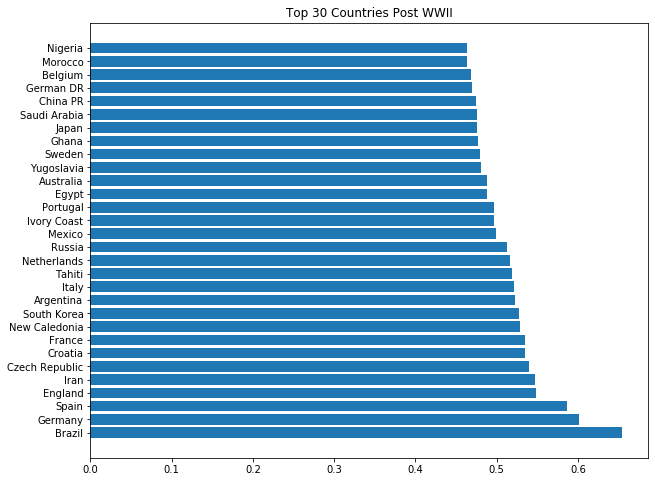

In [20]:
fig, ax = plt.subplots(figsize = (10,8))
ax.barh(top_30['team'], top_30['winning_rate'],align='center')
plt.title('Top 30 Countries Post WWII')
plt.show()